In [ ]:
example one

In [14]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [17]:
boston = load_boston()

x,y = boston.data, boston.target

xtrain,xtest, ytrain, ytest= train_test_split(x,y, test_size=0.15)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [34]:
xgbr= XGBRegressor(verbosity=0)
print(xgbr)
help(XGBRegressor)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)
Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective='reg:squarederror', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to nu

In [10]:
xgbr.fit(xtrain, ytrain)
score =xgbr.score(xtrain,ytrain)
print("Training score: ", score)

Training score:  0.9999954804704844


In [11]:
cv_score = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.8510491634912055


In [12]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error (ytest, ypred)

print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  11.516568602072079
RMSE:  5.758284301036039


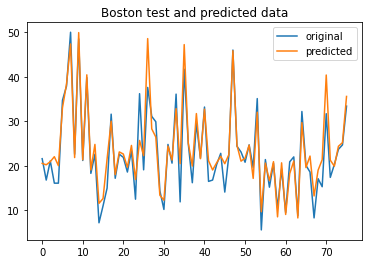

In [15]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label= "predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

# Example 2

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data

In [19]:
xlsx = pd.ExcelFile('./Data/Outliers_out.xlsx')
df = pd.read_excel(xlsx, '1x 5s')
dataset= df.copy()

In [20]:
column_names = ['DEPTH', 'SP', 'RHOB', 'NPHI','ILD','GR']

In [ ]:
# clean and prepare data

In [22]:
# If the dataset contains a few unknown values.

dataset.isna().sum()

#if so Drop those rows to keep this initial tutorial simple.

dataset = dataset.dropna()

#then confirm drop
dataset.isna().sum()

# help(dataset.sample)

DEPTH    0
SP       0
RHOB     0
NPHI     0
ILD      0
GR       0
dtype: int64

In [ ]:
#### splitting data

In [23]:
#### Split the data into train and test

# the 'sample' method takes a certain fraction randomly
#Note that we use `random_state` to ensure the reproducibility of the examples.
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [24]:

# split datat into input and target

train_input = train_dataset.copy()
test_input = test_dataset.copy()

train_target = train_input.pop('RHOB')
test_target = test_input.pop('RHOB')



In [25]:

train_input.head()
# type(train_input)

,DEPTH,SP,NPHI,ILD,GR
933,1431.0360,99.3533,0.5659,26.4863,23.6097
3691,1861.2612,70.0695,0.3042,1.7244,30.0409
2730,1709.9280,77.9375,0.4263,3.5973,28.8262
142,1306.0680,82.7469,0.6216,0.6879,37.5992
3294,1795.8816,73.9070,0.1362,2.0932,27.7350


# Prediciton and selecting the Algorithm

In [26]:
import xgboost
classifier=xgboost.XGBRegressor()

In [27]:
import xgboost
regressor=xgboost.XGBRegressor()

In [28]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [31]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [32]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

NameError: name 'RandomizedSearchCV' is not defined

In [33]:
# random_cv.fit(train_input,train_target)
help(regressor)

Help on XGBRegressor in module xgboost.sklearn object:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective='reg:squarederror', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Test.shape

In [ ]:
df_Test.head()

In [ ]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)